In [40]:
# (k)Average Loan Vs Year 2001-2019 - look at change over year
# look at everything together initially, then per loan loan type, 
# per school type, per state
import xlrd

folders = ["06-07", "07-08", "08-09", "09-10", "10-11", "11-12", "12-13", \
           "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20"]
files = ["2006_2007", "2007_2008", "2008_2009", "2009_2010", "2010_2011", \
         "2011_2012", "2012_2013", "2013_2014", "2014_2015", "2015_2016", \
         "2016_2017", "2017_2018", "2018_2019", "2019_2020"]
quarters = ["Q1", "Q2", "Q3", "Q4"]


In [41]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [42]:
average_loan_per_person = {}  # this is the average for that year and quarter, [year][quarter]
average_loan_school_type = {} # this is the average loan for that school type, [year][quarter][type]
average_loan_state = {}       # this is the average loan for that each state , [year][quarter][state]

In [43]:
def getMetrics(data, year, quarter):
    # indexed off school type ('Public, private') and state the school is in ("TN")
    # total gives running total, other gives count
    school_type_total = {}
    school_type_count = {}
    state_total = {}
    state_count = {}
    
    total_dollar_disbursed = 0
    sub_dollar_disbursed = 0
    unsub_dollar_disbursed = 0
    plus_dollar_disbursed = 0

    total_num_disbursed = 0
    sub_num_disbursed = 0
    unsub_num_disbursed = 0
    plus_num_disbursed = 0


    for row in data:
        school_type = row['type']
        school_state = row['state']
        
        # init keys here since we do += below
        if school_type not in school_type_total:
            school_type = school_type.upper();
            school_type_total[school_type] = 0
        if school_type not in school_type_count:
            school_type = school_type.upper();
            school_type_count[school_type] = 0
        if school_state not in state_total:
            school_state = school_state.upper();
            state_total[school_state] = 0
        if school_state not in state_count:
            school_state = school_state.upper();
            state_count[school_state] = 0

        if row['sub'][4] != '-' and row['sub'][4] != ' -':            
            total_dollar_disbursed += row['sub'][4]
            sub_dollar_disbursed += row['sub'][4]
            total_num_disbursed += row['sub'][3]
            sub_num_disbursed += row['sub'][3]
            
            school_type_total[school_type] += row['sub'][4]
            school_type_count[school_type] += row['sub'][3]
            state_total[school_state] += row['sub'][4]
            state_count[school_state] += row['sub'][3]

        if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
            total_dollar_disbursed += row['unsub'][4]
            unsub_dollar_disbursed += row['unsub'][4]
            total_num_disbursed += row['unsub'][3]
            unsub_num_disbursed += row['unsub'][3]
            
            school_type_total[school_type] += row['unsub'][4]
            school_type_count[school_type] += row['unsub'][3]
            state_total[school_state] += row['unsub'][4]
            state_count[school_state] += row['unsub'][3]

        if row['plus'][4] != '-' and row['plus'][4] != ' -':
            total_dollar_disbursed += row['plus'][4]
            plus_dollar_disbursed += row['plus'][4]
            total_num_disbursed += row['plus'][3]
            plus_num_disbursed += row['plus'][3]
            
            school_type_total[school_type] += row['plus'][4]
            school_type_count[school_type] += row['plus'][3]
            state_total[school_state] += row['plus'][4]
            state_count[school_state] += row['plus'][3]
            
    # init dictionaries here since they might not exist when dereferencing them below
    if year not in average_loan_per_person:
        average_loan_per_person[year] = {}
    if year not in average_loan_school_type:
        average_loan_school_type[year] = {}
    if year not in average_loan_state:
        average_loan_state[year] = {}

    if quarter not in average_loan_per_person[year]:
        average_loan_per_person[year][quarter] = {}
    if quarter not in average_loan_school_type[year]:
        average_loan_school_type[year][quarter] = {}
    if quarter not in average_loan_state[year]:
        average_loan_state[year][quarter] = {}

        
    if total_num_disbursed == 0:
        average_loan_per_person[year][quarter] = 0;
    else:
        average_loan_per_person[year][quarter] = total_dollar_disbursed/total_num_disbursed
    
    for key in school_type_total.keys():
        if key not in average_loan_school_type[year][quarter]:
            average_loan_school_type[year][quarter][key] = {}
        
        # handle division by 0
        if school_type_count[key] == 0:
            average_loan_school_type[year][quarter][key] = 0
        else:
            average_loan_school_type[year][quarter][key] = school_type_total[key]/school_type_count[key]
    for key in state_total.keys():
        if key not in average_loan_state[year][quarter]:
            average_loan_state[year][quarter][key] = {}
            
        # handle division by 0
        if state_count[key] == 0:
            average_loan_state[year][quarter][key] = 0
        else:
            average_loan_state[year][quarter][key] = state_total[key]/state_count[key]




In [44]:
for i in range(len(folders)):
    for quarter in quarters:
        filename = '../data/06-20/' + folders[i] + '/DL_Dashboard_AY' + files[i] + '_' + quarter + '.xls'
        data = getData(filename)
        getMetrics(data, files[i], quarter)

In [45]:
average_loan_per_person_array = {}  # year_quarter: average loan amount
average_loan_school_type_array = {} # school type: year_quarter: average loan amount
average_loan_state_array = {} # state: year_quarter: average loan amount

for year in average_loan_per_person:
    for quarter in average_loan_per_person[year]:
        x = year+'_'+quarter
        average_loan_per_person_array[x] = average_loan_per_person[year][quarter]
        
        for school_type in average_loan_school_type[year][quarter]:
            if school_type not in average_loan_school_type_array:
                average_loan_school_type_array[school_type] = {}
            average_loan_school_type_array[school_type][x] = average_loan_school_type[year][quarter][school_type]
            
        for state in average_loan_state[year][quarter]:
            if state not in average_loan_state_array:
                average_loan_state_array[state] = {}
            average_loan_state_array[state][x] = average_loan_state[year][quarter][state]

# test prints
# print(average_loan_per_person_array['2018_2019_Q1'])
# print(average_loan_school_type_array['PUBLIC'])
# print(average_loan_state_array['TN'])


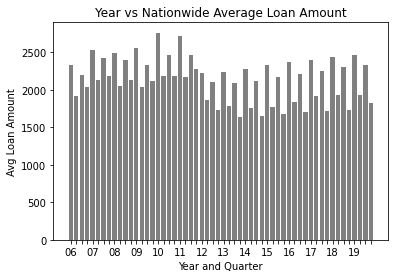

In [46]:
years = ["06", '', '', '', "07", '', '', '', "08", '', '', '', "09", '', '', '', "10", '', '', '', \
         "11", '', '', '', "12", '', '', '', "13", '', '', '', "14", '', '', '', "15", '', '', '', \
         "16", '', '', '', "17", '', '', '', "18", '', '', '', "19", '', '', '',]


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(average_loan_per_person_array.items(), columns=['Year_Quarter', 'Avg Loan Amount'])
x = df["Year_Quarter"]
y = df["Avg Loan Amount"]

plt.bar(x, y, width=0.8, color='gray')
plt.xlabel("Year and Quarter")
plt.ylabel("Avg Loan Amount")
plt.title("Year vs Nationwide Average Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.show()

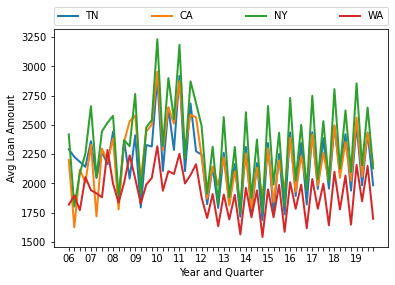

In [47]:
# Year vs Average Loan Amount Per State
state_list = ["TN", "CA", "NY", "WA"]

# for state in average_loan_state_array: # graph them all
for state in state_list:
    df = pd.DataFrame(average_loan_state_array[state].items(), columns=['Year_Quarter', 'Avg Loan Amount'])
    x = df["Year_Quarter"]
    y = df["Avg Loan Amount"]    
    plt.plot(x, y, linewidth=2, label=state)

plt.xlabel("Year and Quarter")
plt.ylabel("Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()

# todo, consider https://python-graph-gallery.com/124-spaghetti-plot/

In [59]:
statesab = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
years = ["2006_2007", "2007_2008", "2008_2009", "2010_2011", "2011_2012"
         "2012_2013", "2013_2014", "2014_2015", "2016_2017", "2018_2019",
        "2019_2020"]

Southeast = ["VA", "WV", "KY", "MO", "AR", "LA", "MS", "AL", "GA", "FL", "SC", "NC", "TN"]
Northwest = ["MN", "IA", "NE", "WY", "ID", "OR", "WA", "MT", "ND", "SD", "AK", "HI"]
Northeast = ["IL", "WI", "MI", "IN", "OH", "MD", "DE", "NJ", "PA", "NY", "CT", "RI","MA", "VT", "NH", "ME"]
Southwest = ["TX", "OK", "KS", "CO", "UT", "NV", "CA", "AZ", "NM"]


year_total = 0
x = 1
for x in range (1,5):
    year_total += average_loan_state_array['TN'][(years[1]+"_Q"+str(x))]

print(year_total)

SyntaxError: invalid syntax (<ipython-input-59-058feb13c4ea>, line 11)